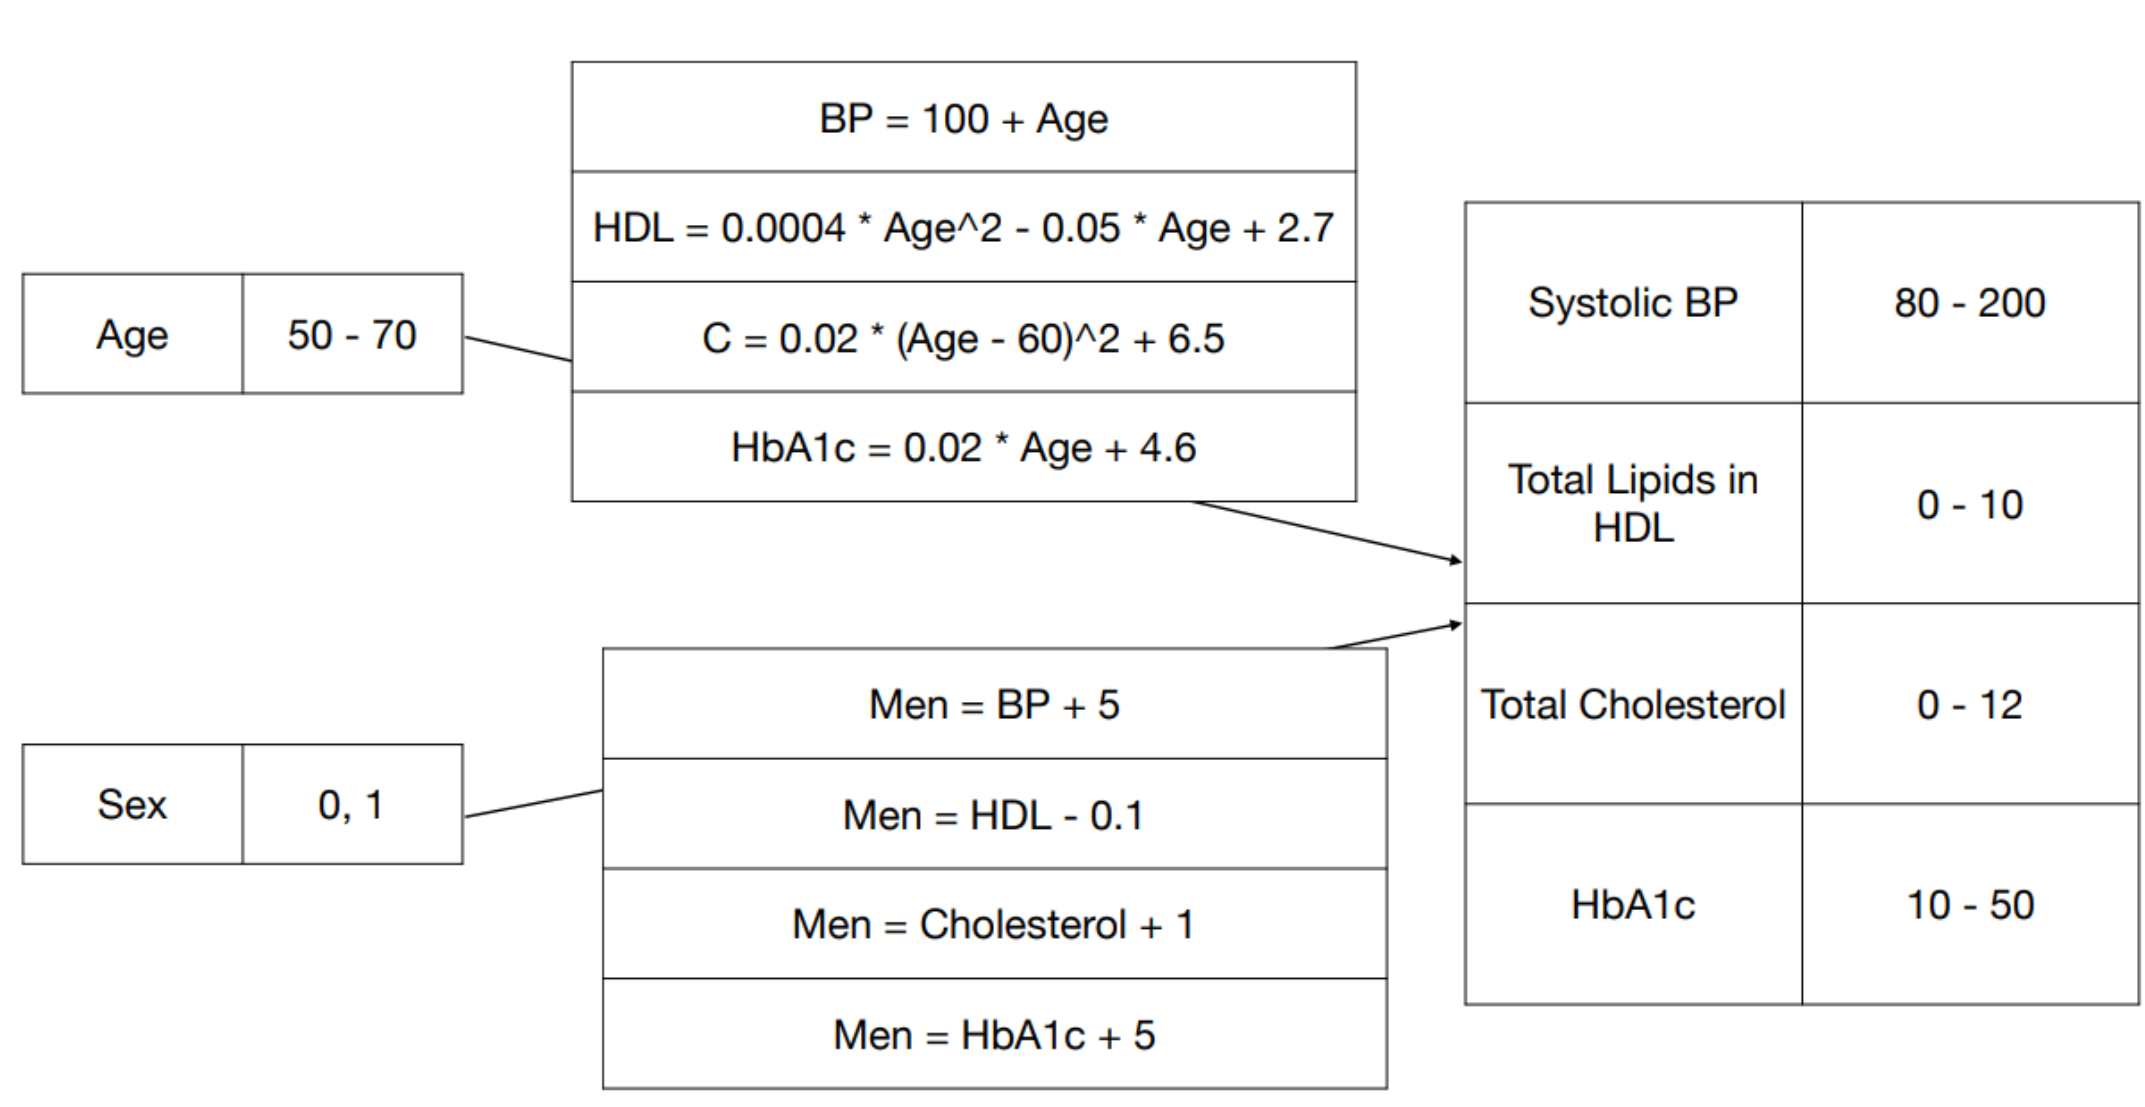

In [1]:

# HbA1c= SI + LS(sex)+ LS(age)

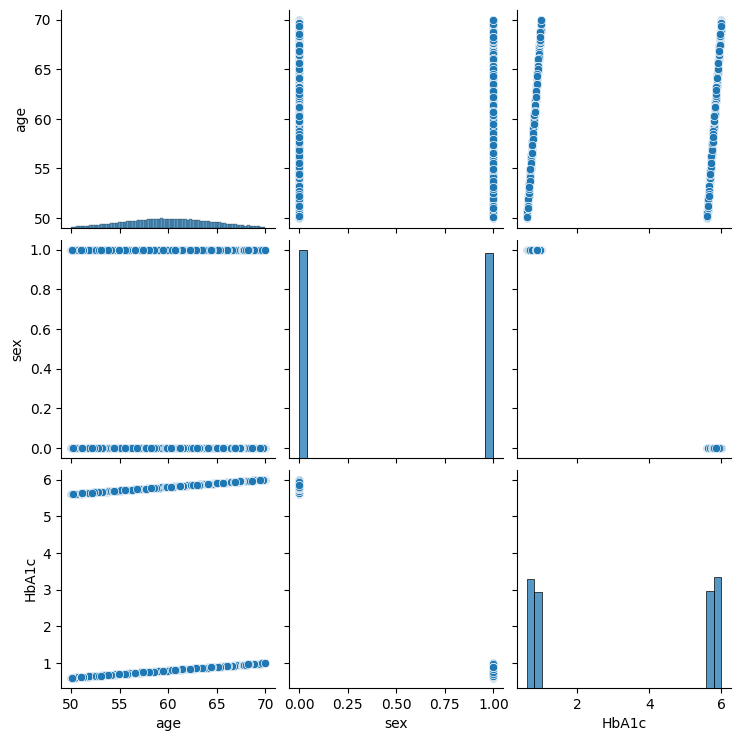

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
n=100_000

np.random.seed(0)

mean, sd = 60, 5
age = []
while len(age) < n:
    sample = np.random.normal(mean, sd, n)
    valid = sample[(sample >= 50) & (sample <= 70)]
    age.extend(valid)
age = np.array(age[:n])

sex = np.random.binomial(1, 0.5, n)

# Base model
hb_raw = 0.02 * age + 4.6 - 5 * sex

df = pd.DataFrame({'age': age, 'sex': sex, 'HbA1c': hb_raw})
df.head()
sns.pairplot(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     100000 non-null  float64
 1   sex     100000 non-null  int64  
 2   HbA1c   100000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.3 MB


In [4]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [5]:
import os
from utils.configuration import *

In [6]:
experiment_name = "ukb_prep"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [7]:
setup_configuration(experiment_name,EXPERIMENT_DIR)


Configuration already exists/home/bule/TramDag/dev_experiment_logs/ukb_prep/configuration.json


In [8]:
data_type={'age':'continous','sex':'ordinal_Xc_Yo','HbA1c':'continous'}
data_type

{'age': 'continous', 'sex': 'ordinal_Xc_Yo', 'HbA1c': 'continous'}

In [9]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
age                  | continous       | continuous [c]                 | continuous [c]                
sex                  | ordinal_Xc_Yo   | continuous [c]                 | ordinal    [0,…,K]            
HbA1c                | continous       | continuous [c]                 | continuous [c]                
---------------------------------------------------------------------------------------------------------
Configuration updated successfully.


/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


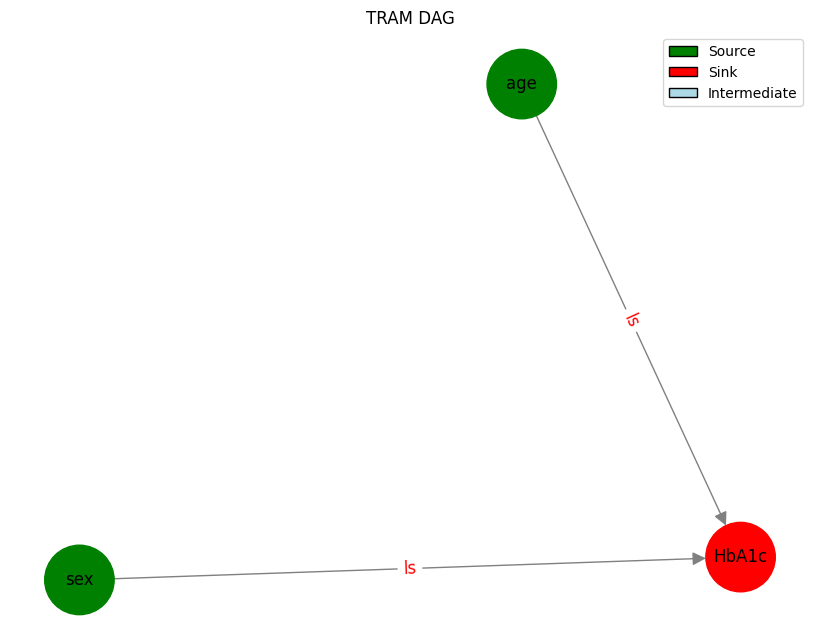

In [10]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

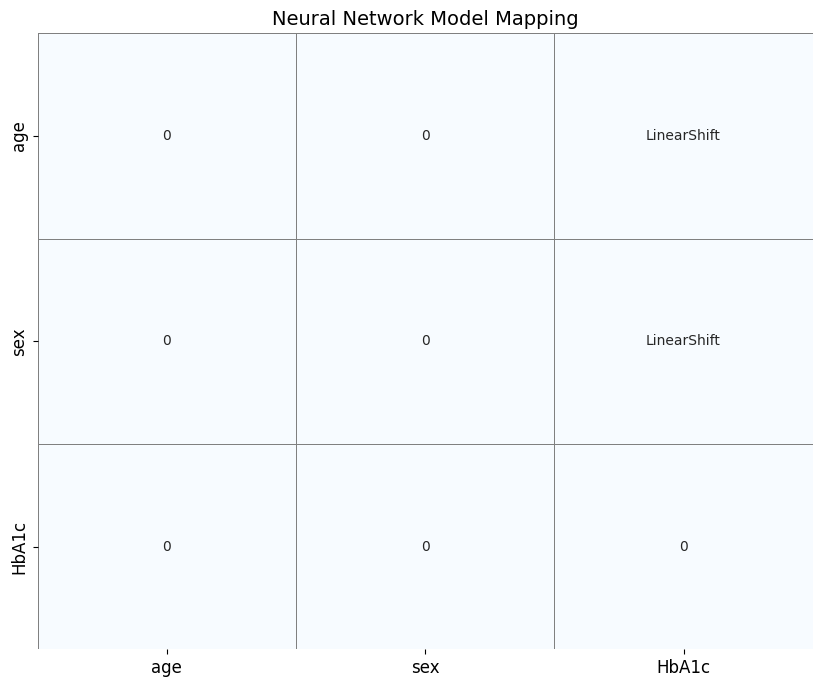

In [11]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

# API usage

In [12]:
# load configuration
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/ukb_prep/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [13]:
# initalize model
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 


[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'age' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':              age  sex     HbA1c
75220  65.437379    0  5.908748
48955  53.764302    0  5.675286
44966  60.308627    1  0.806173
13568  67.304162    0  5.946083
92727  69.484093    0  5.989682
...          ...  ...       ...
6265   66.221686    1  0.924434
54886  55.693262    0  5.713865
76820  57.918085    0  5.758362
860    61.837724    1  0.836754
15795  62.915791    1  0.858316

[80000 rows x 3 columns]}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Wrote DataFrame to temporary CSV: temp/initial_data_1760536318.csv
[DEBUG] R script written to: /tmp/tmphk8jkufh.R
[DEBUG] R code:
 
library(MASS)
library(tram)
library(readr)

data <- read_csv("temp/initial_data_1760536318.csv")
model <- Colr(`age` ~ 1, data=data, order=19)
cat(mo

In [14]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-3,
             epochs=550,batch_size=1000,
             save_linear_shifts=True,
             verbose=True,debug=False,
             device=device,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/ukb_prep/min_max_scaling.json
[INFO] Training 3 nodes (sequential) on cpu

[INFO] Training node 'age' for 550 epochs on cpu (pid=505227)
[INFO] Existing model found. Loading weights and history...

===== Epoch 501/550 =====
[INFO] Saved new best model.
[INFO] Epoch 501: Train NLL=2.8603 | Val NLL=2.8531 | Time=1.18s

===== Epoch 502/550 =====
[INFO] Saved new best model.
[INFO] Epoch 502: Train NLL=2.8601 | Val NLL=2.8529 | Time=0.79s

===== Epoch 503/550 =====
[INFO] Saved new best model.
[INFO] Epoch 503: Train NLL=2.8599 | Val NLL=2.8526 | Time=0.91s

===== Epoch 504/550 =====
[INFO] Saved new best model.
[INFO] Epoch 504: Train NLL=2.8596 | Val NLL=2.8524 | Time=0.75s

===== Epoch 505/550 =====
[INFO] Saved new best model.
[INFO] Epoch 505: Train NLL=2.8594 | Val NLL=2.8522 | Time=0.76s

===== Epoch 506/550 =====
[INFO] Saved new best model.
[INFO] Epoch 506

[WARNING] No linear shift history found for node 'age' at /home/bule/TramDag/dev_experiment_logs/ukb_prep/age/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'sex' at /home/bule/TramDag/dev_experiment_logs/ukb_prep/sex/linear_shifts_all_epochs.json


/tmp/ipykernel_505227/4185427859.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x[0][0] if isinstance(x, list) and isinstance(x[0], list) else x)


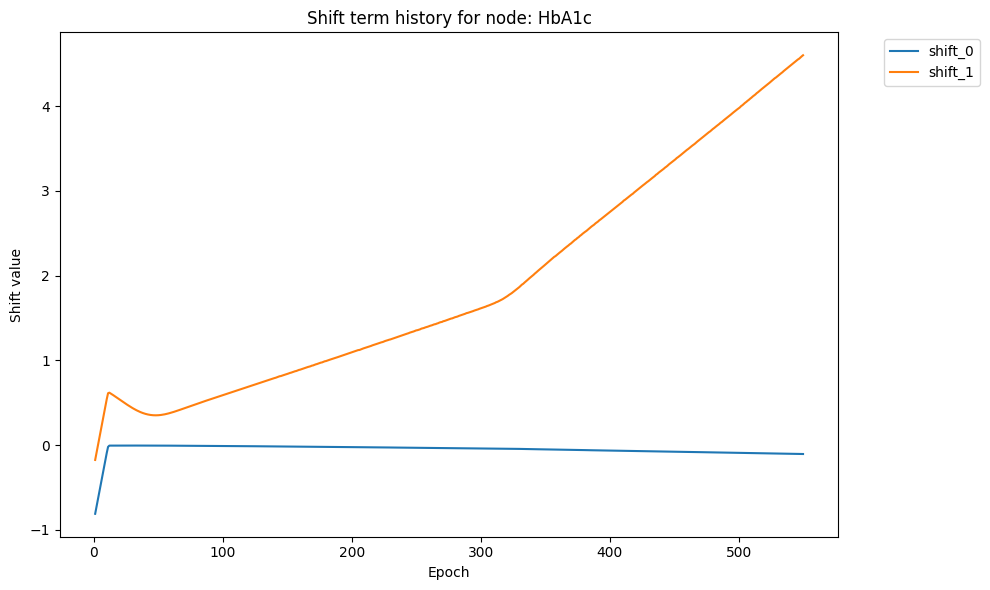

In [23]:
linear_shift=td_model.linear_shift_history()
linear_shift
import matplotlib.pyplot as plt
import pandas as pd

def plot_shift_histories(data_dict, node='target'):
    """
    Plot the evolution of shift terms across epochs for a given node (e.g., 'target').

    Args:
        data_dict (dict): Dictionary where keys are node names (e.g., 'target')
                          and values are DataFrames with epochs as columns and shifts as rows.
        node (str): Node name to plot (default='target')
    """
    df = data_dict[node].copy()

    # Flatten nested lists in DataFrame cells
    df = df.applymap(lambda x: x[0][0] if isinstance(x, list) and isinstance(x[0], list) else x)

    # Convert column names to integers if possible
    df.columns = [int(c.replace('epoch_', '')) if isinstance(c, str) and c.startswith('epoch_') else c for c in df.columns]

    # Sort by epoch
    df = df.reindex(sorted(df.columns), axis=1)

    # Plot each shift
    plt.figure(figsize=(10, 6))
    for shift in df.index:
        plt.plot(df.columns, df.loc[shift], label=shift)

    plt.xlabel('Epoch')
    plt.ylabel('Shift value')
    plt.title(f'Shift term history for node: {node}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
plot_shift_histories(linear_shift, node='HbA1c')


[INFO] Loaded training/validation histories for 3 nodes.


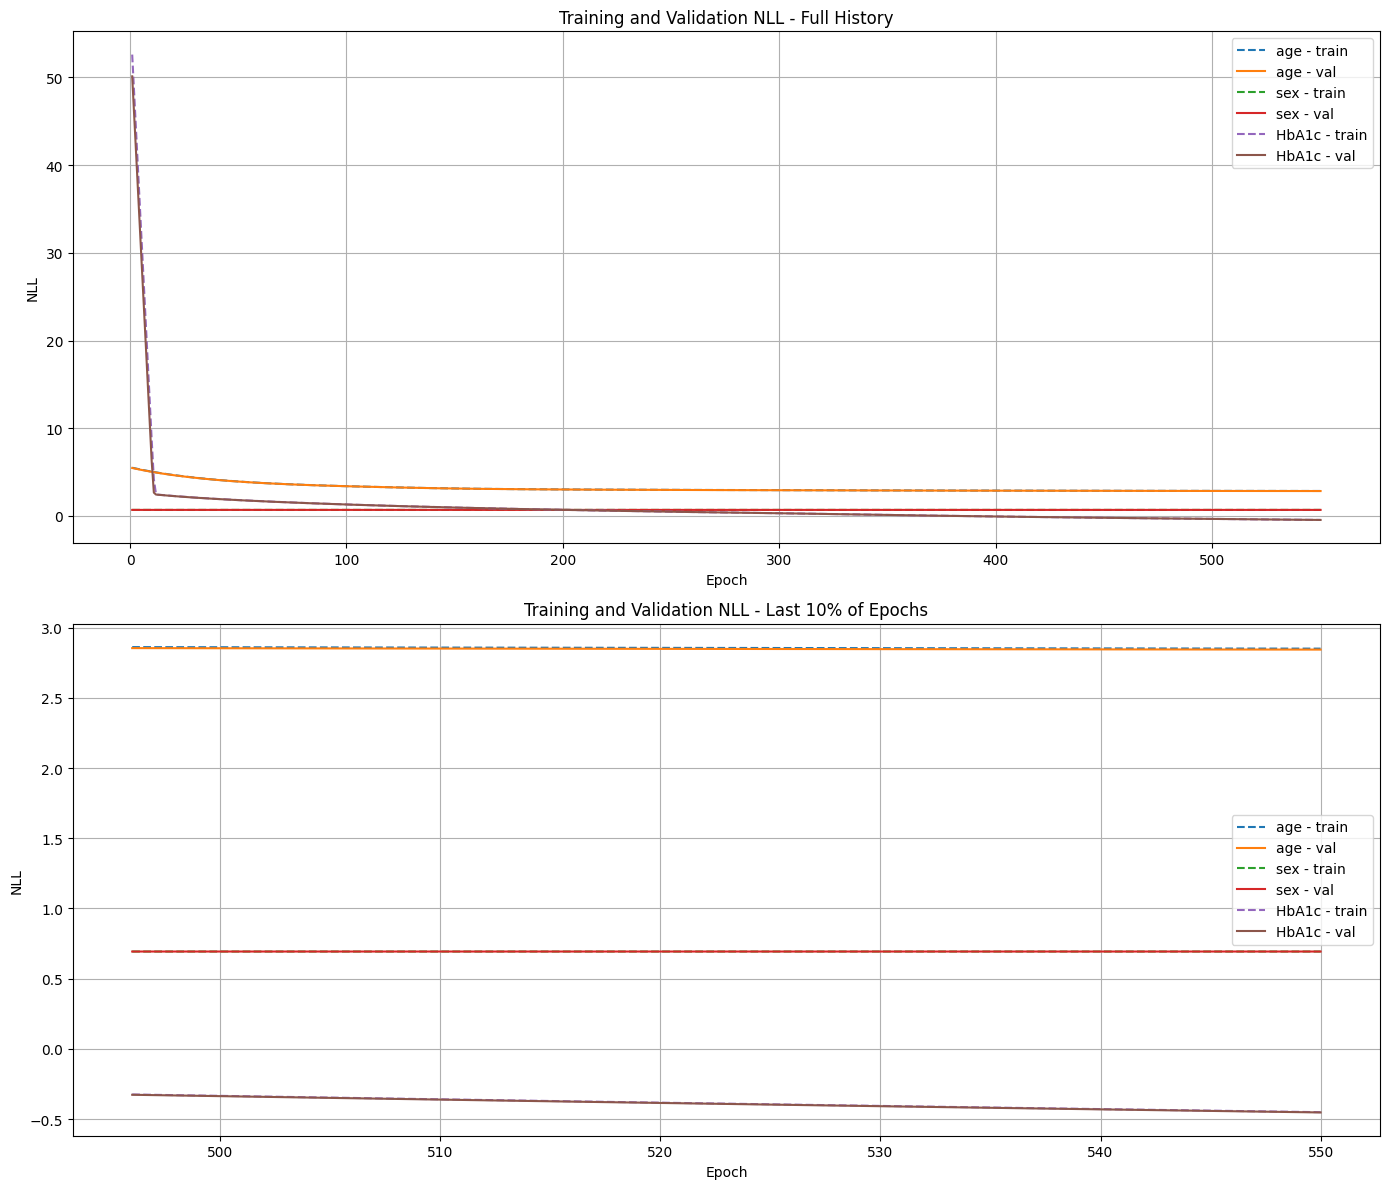

In [15]:
td_model.plot_history()

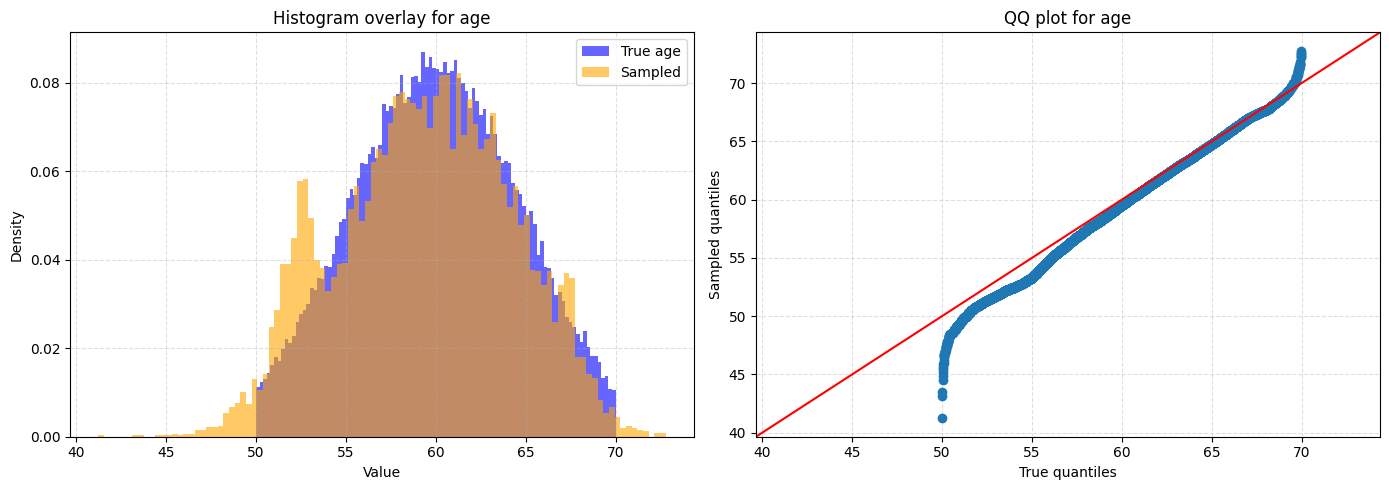

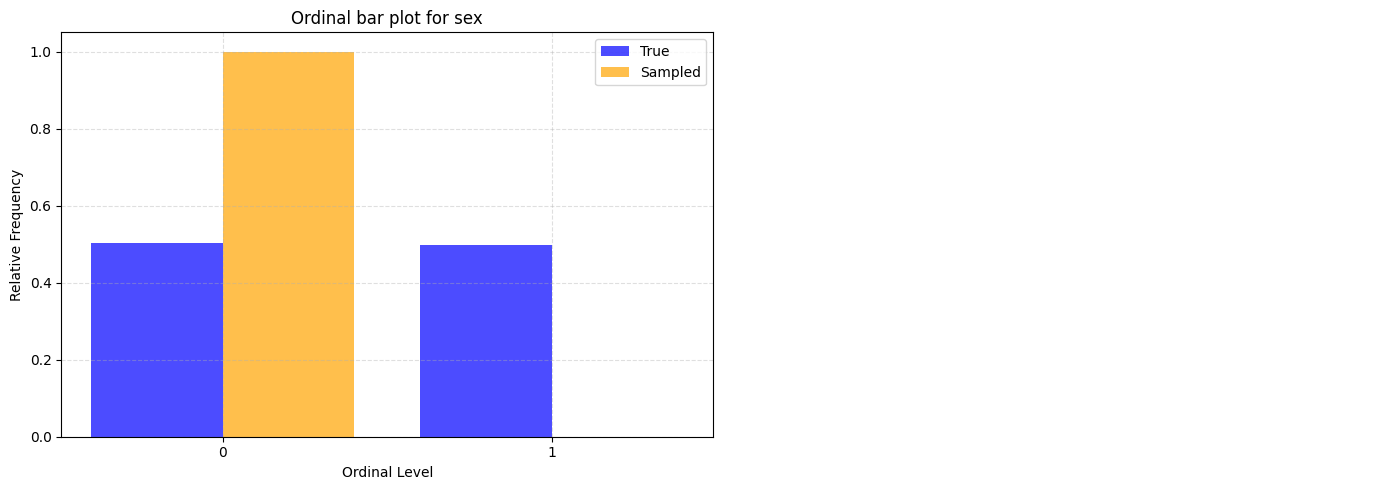

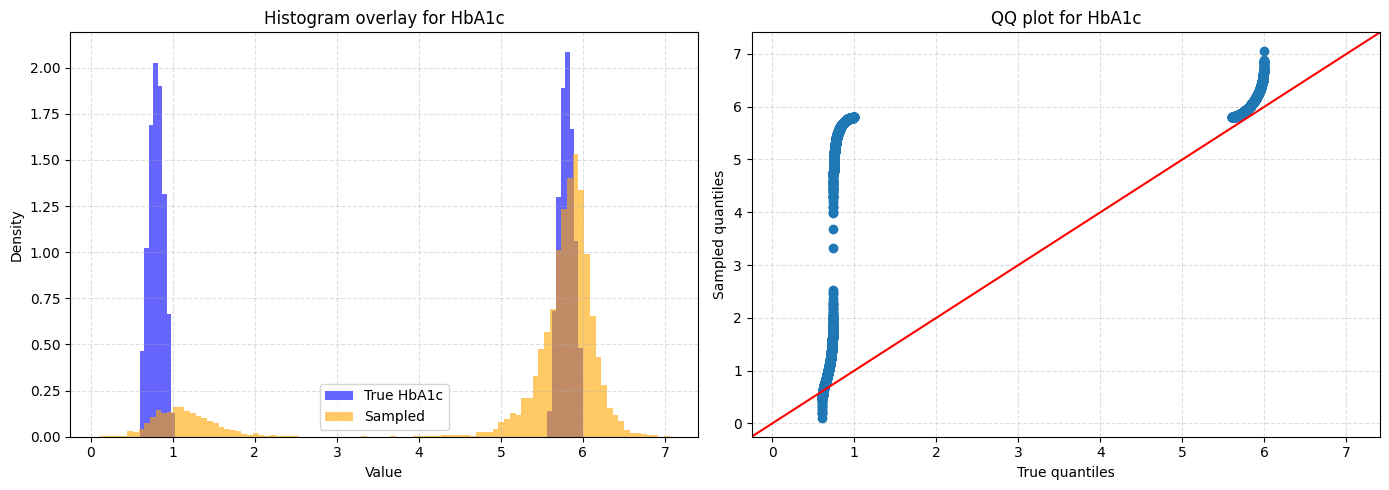

In [16]:
td_model.show_samples_vs_true(train_df)

In [17]:
rsamples, latents = td_model.sample()

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Deleting all previously sampled data.
Deleted directory: /home/bule/TramDag/dev_experiment_logs/ukb_prep/age/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/ukb_prep/sex/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/ukb_prep/HbA1c/sampling

----*----------*-------------*--------Sample Node: age ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node age from standard logistic distribution
[WARNING] target_col 'age' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 47.83it/s]

[INFO] Completed sampling for node 'age'

----*----------*-------------*--------Sample Node: sex ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node sex from standard logistic distribution
[WARNING] target_col 'sex' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Completed sampling for node 'sex'

----*----------*-------------*--------Sample Node: HbA1c ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node HbA1c from standard logistic distribution
[WARNING] target_col 'HbA1c' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 47.04it/s]

[INFO] Completed sampling for node 'HbA1c'
[INFO] DAG sampling completed successfully for all nodes.


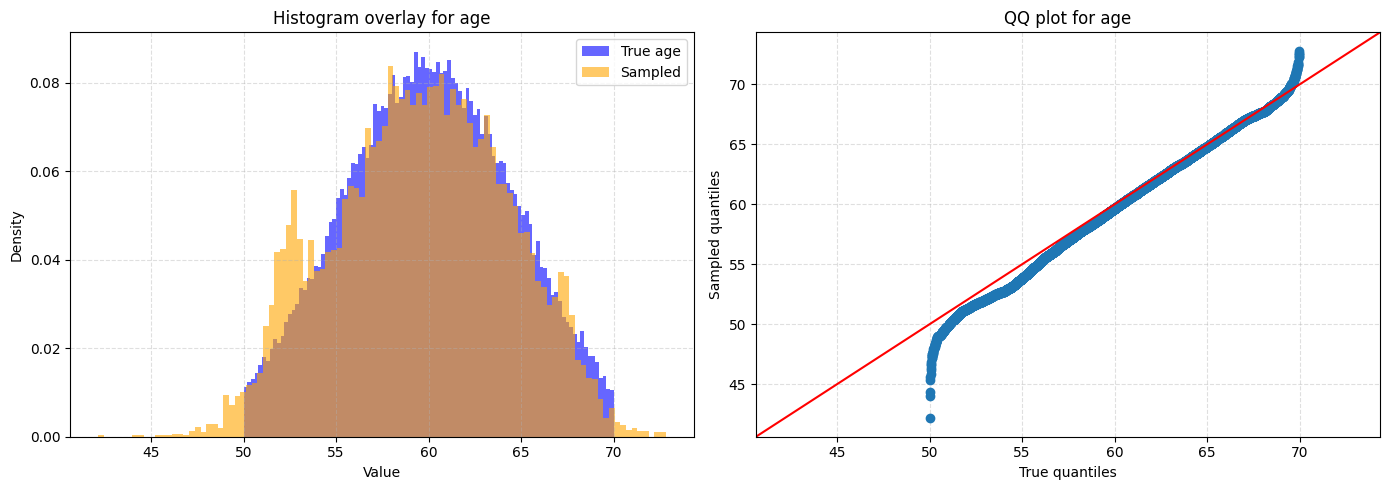

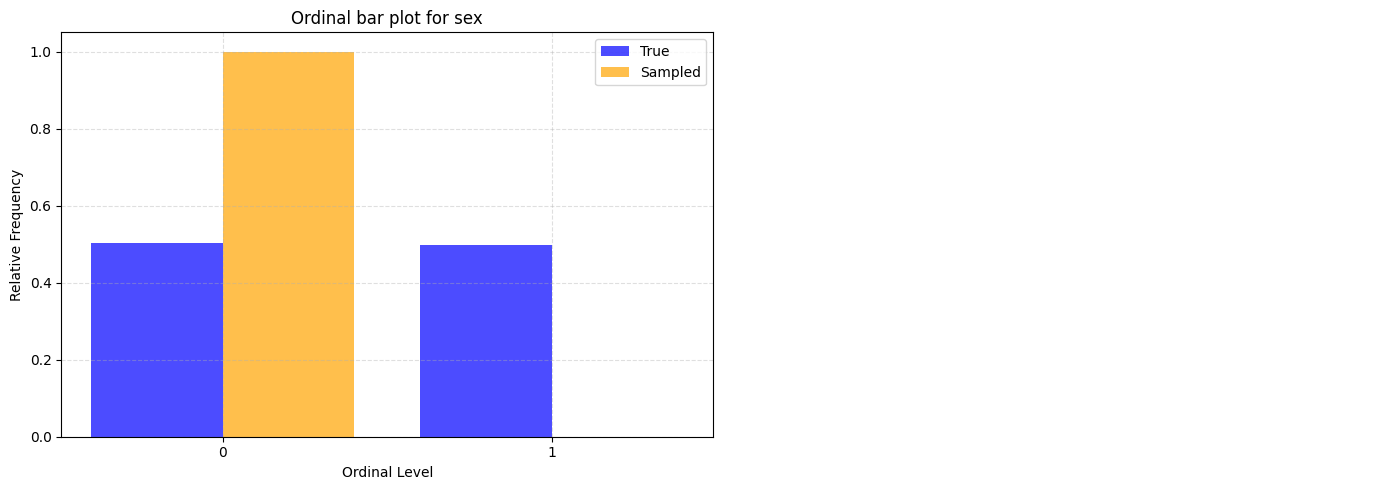

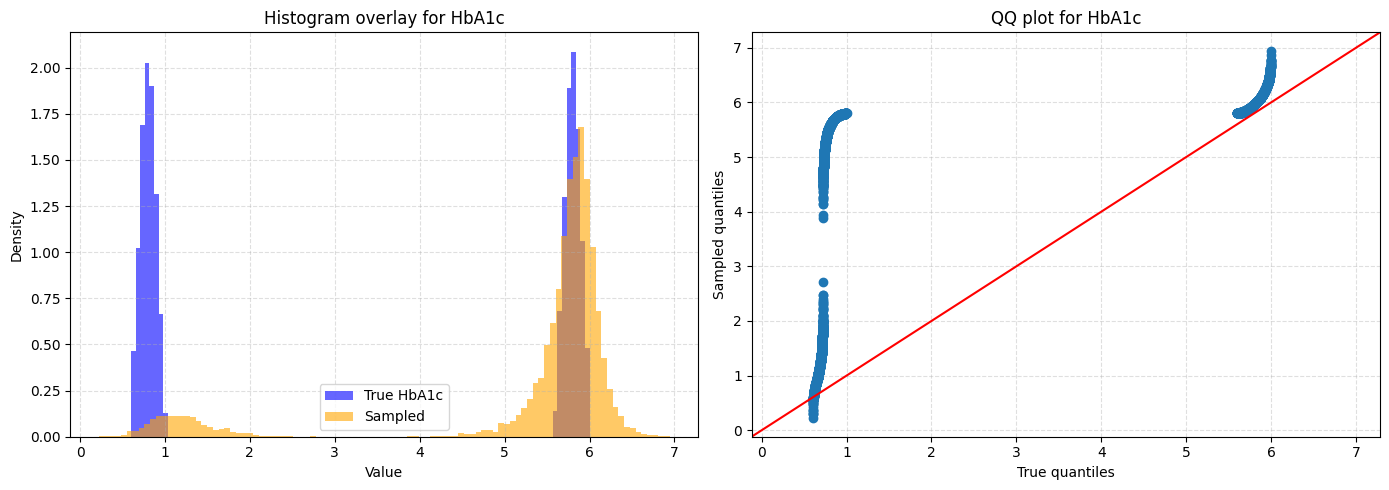

In [18]:
td_model.show_samples_vs_true(train_df)